# ASSIGNMENT_15thFEB_2023_PWSKIILLS




## Q1. What is multiprocessing in python? Why is it useful?

**Multiprocessing** is a package that supports spawning processes using an API similar to the threading module. The multiprocessing package offers both local and remote concurrency, effectively side-stepping the Global Interpreter Lock by using subprocesses instead of threads. Due to this, the multiprocessing module allows the programmer to fully leverage multiple processors on a given machine

Consider a computer system with a single processor. If it is assigned several processes at the same time, it will have to interrupt each task and switch briefly to another, to keep all of the processes going.

A multiprocessing system can have:

* multiprocessor, i.e. a computer with more than one central processor.
* multi-core processor, i.e. a single computing component with two or more independent actual processing units (called “cores”).

#### Why is it useful?

* Separate memory space
* Code is usually straightforward
* Takes advantage of multiple CPUs & cores
* Avoids GIL limitations for cPython
* Eliminates most needs for synchronization primitives unless if you use shared memory (instead, it's more of a communication model for IPC)
* Child processes are interruptible/killable
* Python multiprocessing module includes useful abstractions with an interface much like threading.Thread
* A must with cPython for CPU-bound processing

## Q2. What are the differences between multiprocessing and multithreading?

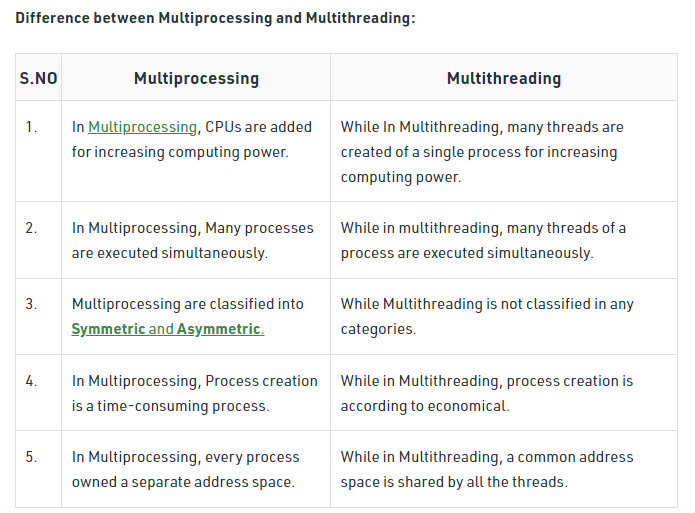

## Q3. Write a python code to create a process using the multiprocessing module.

In [3]:
# Example code for demo of multiprocessing

from multiprocessing import Process
import time

list1 = [i for i in range(1,10)]

def calc_square(num):
    for i in num:
        #time.sleep(1)
        print('Square of {} is {}'.format(i,i**2))
        

def calc_cube(num):
    for i in num:
        #time.sleep(1)
        print('Cube of {} is {}'.format(i,i**3))
        
# Create two different process
p1 = Process(target=calc_square,args=(list1,))
p2 = Process(target=calc_cube,args=(list1,))


# Start of the process

p1.start()
p2.start()

## Wait for the process
p1.join()
p2.join()

Square of 1 is 1
Cube of 1 is 1Square of 2 is 4

Cube of 2 is 8Square of 3 is 9

Cube of 3 is 27Square of 4 is 16

Cube of 4 is 64Square of 5 is 25

Cube of 5 is 125Square of 6 is 36

Cube of 6 is 216Square of 7 is 49

Square of 8 is 64Cube of 7 is 343

Square of 9 is 81Cube of 8 is 512

Cube of 9 is 729


## Q4. What is a multiprocessing pool in python? Why is it used?

A **process pool** object which controls a pool of worker processes to which jobs can be submitted. It supports asynchronous results with timeouts and callbacks and has a parallel map implementation. 

Python provides a process pool via the multiprocessing.Pool class.


## Why is it used?

A **process pool** is a programming pattern for automatically managing a pool of worker processes.

* The pool is responsible for a fixed number of processes.

* It controls when they are created, such as when they are needed.
* It also controls what they should do when they are not being used, such as making them wait without consuming computational resources.
* The pool can provide a generic interface for executing ad hoc tasks with a variable number of arguments, much like the target property on the Process object, but does not require that we choose a process to run the task, start the process, or wait for the task to complete.


## Q5. How can we create a pool of worker processes in python using the multiprocessing module?

In [2]:
# Example code showing how can we create pool of worker process in python using Multiprocessing

import multiprocessing
import time
from multiprocessing import Pool

# Function to calculate the sum of the sqaure of numbers

def square_sum(numbers):
    sum = 0
    for i in numbers:
        sum=sum+(i*i)
        return sum

# Creating a function with pool of process
def sum_sqaure_with_mp(numbers):
    start_time = time.time()
    p = Pool()  # Defining a abject of the pool class
    result = p.map(square_sum, (numbers,))  
    p.close()
    p.join()
    
    end_time = time.time() - start_time
    print(f'processing {len(numbers)} numbers took {end_time} time using multprocessing')
    
    
def sum_square_without_mp(numbers):
    start_time = time.time()
    result = []
    for i in numbers:
        result.append(square_sum(numbers))
    end_time = time.time() - start_time
    print(f'processing {len(numbers)} numbers took {end_time} time without multprocessing')
    
if __name__ == '__main__':
    
    numbers= []
    for i in range(1,10000000):
        numbers.append(i)
    sum_sqaure_with_mp(numbers)
    sum_square_without_mp(numbers)
    
    
    
    

processing 9999999 numbers took 1.591231107711792 time using multprocessing
processing 9999999 numbers took 2.2044453620910645 time without multprocessing


## Q6. Write a python program to create 4 processes, each process should print a different number using the multiprocessing module in python.

In [16]:
import multiprocessing
import random
import time

# Function to create random number everytime when it is called through different processes

def random_gen(process1):
    random_num = random.randint(1,40)
    time.sleep(1)
    print(f'The random number is for process {process1} is {random_num}')
          
# Create the process

p1 =  multiprocessing.Process(target=random_gen,args=(1,)) 
p1.start() # Starting the process
p1.join() 
p2 =  multiprocessing.Process(target=random_gen,args=(2,))
p2.start()
p2.join()
p3 =  multiprocessing.Process(target=random_gen,args=(3,))
p3.start()
p3.join()
p4 =  multiprocessing.Process(target=random_gen,args=(4,))
p4.start()



The random number is for process 1 is 32
The random number is for process 2 is 10
The random number is for process 3 is 28
The random number is for process 4 is 21
